# Instagram Bot 2
***********************************************************
inorder to do this project we used two libraries Selenium extensively and Beautiful Soup to some extent
so in the next cell we have imported the dependencies related to the project
************************************************************

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.by import  By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains
import time
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
serv_obj=Service("D:\webbrow\chromedriver.exe")
driver=webdriver.Chrome(service=serv_obj)

# login the instagram
*********************************

Login to your Instagram Handle
Submit with sample username and password

solution) 
in order to achieve the goal I have followed following steps:  
1)accessed the instagram homepage that directed to the login page  
2)located  the text field for username   
3)located the textfield containing the passwords  
4)send keys there  
5)and loged into the  page  

************************************

In [2]:
driver.get("https://www.instagram.com/?hl=en")
wait=WebDriverWait(driver,10)
wait.until(EC.presence_of_element_located((By.NAME,"username")))
userfield=driver.find_element(By.NAME,"username")
passwordfield=driver.find_element(By.NAME,"password")
username="demo_user"
password="demo_password"
userfield.send_keys(username)
passwordfield.send_keys(password)
lg_btn=driver.find_element(By.XPATH,"//button[contains(@class,'_acan _acap _acas')]")
lg_btn.click()
wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"div._ac8f")))
not_save=driver.find_element(By.CSS_SELECTOR,"div._ac8f")
not_save.click()
wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"button._a9--._a9_1")))
not_now=driver.find_element(By.CSS_SELECTOR,"button._a9--._a9_0")
not_now.click()

    




# Question1

**************************************************************

# Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
Now Find the number of posts these handles have done in the previous 3 days.
Depict this information using a suitable graph.


**************************************************************

# Step1
*************************************************************
#1) first we take out the names of the accountsthat appear first in  when we searched food in the search panel.
***************************************************************

In [3]:
frst_ten_food_acnts=[]

wait.until(EC.presence_of_all_elements_located((By.TAG_NAME,"svg")))
bread=driver.find_elements(By.TAG_NAME,"svg")
for i in bread:
    var=i.get_attribute("aria-label")
    
    if(var=="Search"):
        try:
            driver.find_element(By.XPATH,"//input[@aria-label='Search input']")
        except:
            i.click()
            
        break
search_box=driver.find_element(By.XPATH,"//input[@aria-label='Search input']")
val_to_search="food"

search_box.send_keys(val_to_search)
wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,"div.x9f619.x78zum5.xdt5ytf.x6ikm8r.x1odjw0f.x4uap5.x18d9i69.xkhd6sd.xh8yej3.x5yr21d.xocp1fn div._aacl._aaco._aacw._aacx._aad6")))
ele=driver.execute_script("return document.querySelectorAll('div.x9f619.x78zum5.xdt5ytf.x6ikm8r.x1odjw0f.x4uap5.x18d9i69.xkhd6sd.xh8yej3.x5yr21d.xocp1fn');")
ele=ele[0]
height=driver.execute_script("return arguments[0].scrollHeight",ele)
driver.execute_script("arguments[0].scrollBy(0,arguments[1])",ele,height)

search_results=driver.find_elements(By.CSS_SELECTOR,"div.x9f619.x78zum5.xdt5ytf.x6ikm8r.x1odjw0f.x4uap5.x18d9i69.xkhd6sd.xh8yej3.x5yr21d.xocp1fn div._aacl._aaco._aacw._aacx._aad6")

for result in search_results[:10]:
        if(len(result.text)>0 and result.text[0]!="#"):
            frst_ten_food_acnts.append(result.text)
frst_ten_food_acnts

['food_tour_ent',
 'dewasiii',
 'foodtalkindia',
 'm.v_momos_food',
 'indori_foodiess',
 'foodieskagharr',
 'food',
 'foodfiftyfive',
 '_meherfoods_',
 'indian_tasty_food']

# Step 2
************************************************************

now we traverse throught the list obtained earlier  
and then we visit each profile page one by one by formating the url    
here itself we will calculate the followers by going to the division   
then click on the first post and we will start to calculate the post within  made within three days

we will end up with a list of lists that will contain three values name of account , followers ,post _counts.
***************************************************

In [4]:
import datetime
import random
import time
full_data=[]
for acnt in frst_ten_food_acnts:
    temp_data=[]
    lis=[1,2,3,4,5]
    time.sleep(random.choice(lis))
    driver.get(f"https://www.instagram.com/{acnt}/")
    wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,"follow")))
    followers=driver.find_elements(By.CSS_SELECTOR,"span._ac2a")[1].text
    followers=followers.replace(",","") # to deal with , that are present to seperate place values.
    # if k is present then multiplying the value by 1000
    if "K" in followers:
        num=followers[:-2]
        followers=float(num)
        followers=followers*1000
    totl_followings=float(followers)
    num_of_post=0
    ele=driver.find_element(By.CSS_SELECTOR,"div._aagw") 
    ele.click()
    while True:
        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"div._aacl._aacm._aacu._aacy._aad6>time")) )  
        time_elem=driver.find_element(By.CSS_SELECTOR,"div._aacl._aacm._aacu._aacy._aad6>time")
        post_time=time_elem.get_attribute("datetime")
        post_time=datetime.datetime.strptime(post_time[:-1],"%Y-%m-%dT%H:%M:%S.%f")
        time_now=datetime.datetime.now()
        d=datetime.timedelta(days=3)
        time_now=time_now-d
        time.sleep(random.choice(lis))
        try:
            next=driver.find_element(By.CSS_SELECTOR,"div._aaqg._aaqh")
            next.click()
        except:
            break
        if(post_time<time_now):
            break
        num_of_post+=1
        
    temp_data.append(acnt)
    temp_data.append(totl_followings)
    temp_data.append(num_of_post)
    full_data.append(temp_data)

# Step 3
*****************************************************************************************
 now we have the dataset list of lists we can easily convert into dataframe of pandas to perform operations .  
 we will convert into dataframe  
 we will then sort it on basis of follower counts bsc we want top 5 accounts on basis of followers  
 then we slice this result to 5 accounts.  
 and finally we depict this information
****************************************************************************************

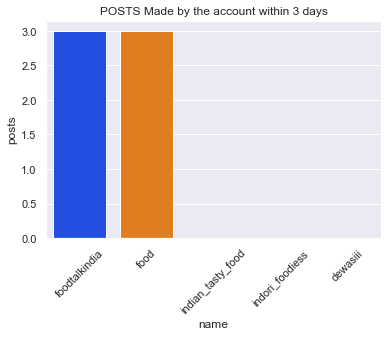

,name,followers,posts
2,foodtalkindia,30000.0,3
6,food,18000.0,3
9,indian_tasty_food,16000.0,0
4,indori_foodiess,6513.0,0
1,dewasiii,4713.0,0


In [5]:
sns.set()
full_data
data=pd.DataFrame(full_data)
data.columns=["name","followers","posts"]
ind=data.followers.argsort()
ind.values
ind=list(ind.values)
data=data.iloc[ind[::-1]]
sns.set_palette(palette="bright")
data=data.iloc[:5,:]
data
plt.xticks(rotation = 45)
sns.barplot(y="posts",x="name",data=data)
plt.title("POSTS Made by the account within 3 days")
plt.show()
data

# Question 2

**********************************************************************
Your friend also needs a list of hashtags that he should use in his posts.
Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
Create a csv file with two columns : the word and its frequency
Now, find the hashtags that were most popular among these bloggers
Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

*****************************************************************************

# Step 1

***************************************************************
what we are going to do is we are going to go to each  account profile    
start traversing to the top 10 posts    
then we will extract each and every word that is present in the post even in comment or in discription and we are going to append this words into a list .

**************************************************************

In [6]:
full_data=[]
all_words=[]
for acnt in data.name:
    temp_data=[]
    lis=[1,2,3,4,5]
    time.sleep(random.choice(lis))
    driver.get(f"https://www.instagram.com/{acnt}/")
    wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,"follow")))
    followers=driver.find_elements(By.CSS_SELECTOR,"span._ac2a")[1].text
    ele=driver.find_element(By.CSS_SELECTOR,"div._aagw")
    ele.click()
    num_of_post=0
    while num_of_post<10:
        wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"span._aacl._aaco._aacu._aacx._aad7._aade")) )  
        elements=driver.find_elements(By.CSS_SELECTOR,"span._aacl._aaco._aacu._aacx._aad7._aade")
        for elem in elements:
            content=bs(elem.get_attribute("outerHTML"),"html.parser")
            lst=list(content.stripped_strings)
            for i in lst:
                word=i.split(" ")
                all_words.extend(word)
        time.sleep(random.choice(lis))
        # search for the next button 
        try:
            next=driver.find_element(By.CSS_SELECTOR,"div._aaqg._aaqh")
            next.click()
        except:
            break
        num_of_post+=1
print(all_words)

['Here’s', 'your', 'guide', 'to', "India's", 'biggest', 'Gin', 'Festival', 'this', 'weekend!', '🥳', 'From', '15', 'Cocktail', 'Bars,', 'Pop-Up', 'Restaurants,', 'Live', 'Music', 'Acts,', 'Shopping', 'and', 'more!', '🍽️🍸🤤🎶', 'We', "can't", 'wait', 'to', 'come', 'celebrate', '#GinOClock', 'with', 'you', 'at', 'the', 'Gin', 'Explorers', 'Club', '-', 'Mythical', 'Edition!', '👯\u200d♀️', 'Come', 'and', 'get', 'gin-ing!', '🍸🎉', 'When:', '5th', '&', '6th', 'November', '🥳', 'Time:', '12pm', '-', '10pm', 'Where:', 'Jayamahal', 'Palace,', 'Bengaluru', '📍', 'Get', 'your', 'tickets', 'now!', '🎟️', '.', '.', '.', '#ginexplorersclub', '#bengaluru', '#mythicaledition', '#foodtalkindia', '#foodtalk', '#drinks', '#fti', '#food', '#foodie', '#foodies', '#foodgram', '#foodgasm', '#foodiesofindia', '#foodblogger', '#foodfeed', '#delicious', '#yummy', '#instagood', '#instafood', '#instagram', '#discover', '🔥🔥', 'Experience', 'the', 'best', 'of', 'artisanal', 'brands', 'at', 'the', 'Explorers', 'Flea', 'at'

# Step 2
*********************************************************
we have a list of words that we have encountered   
now we just use it pandas library and convert it into dataframe  
now we use count function of the pandas library and we get the word count
then we just convert it into csv file using inbuilt function of pandas library

*********************************************************

In [7]:
import pandas
import numpy
word_list=pd.DataFrame(all_words)
# data[0]value_counts
word_list.columns=["words"]
df=word_list.words.value_counts()
df=pd.DataFrame(df)
df =df[df.words != ""]
df.columns=["count"]
df.to_csv("word_count.csv",index_label="words")
df=pd.read_csv("word_count.csv")
df

,words,count
0,.,131
1,the,61
2,to,56
3,and,46
4,a,37
...,...,...
1801,sooo,1
1802,@jo210391,1
1803,brilliant!,1
1804,Absolutely,1


# Step 3
 *************************************************
 
 in order to show how many hashtags counts are there we use thefunction that gives us the indexvalue of the rows in which # is  present once we get this rows we can get this values and plot it on a pie plot
 ******************************************************

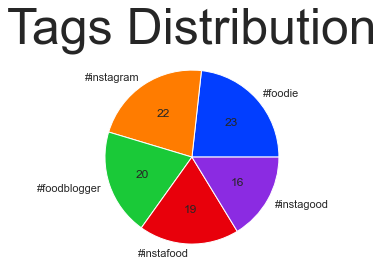

In [8]:
ind=df["words"].str.contains("#",na=False)
hash_tags=df[ind]
sns.set_palette(palette="bright")
hash_tags.index
hash_tags.reset_index(drop=True)
hash_tags=hash_tags.iloc[:5]
plt.pie(hash_tags["count"],labels=hash_tags["words"],autopct="%.f",radius=1)
plt.title("Tags Distribution" ,fontsize=50)
plt.show()


# Question 3 
******************************************************************

You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:
Find out the likes of the top 10 posts of the 5 handles obtained earlier.
Calculate the average likes for a handle.
Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
Create a bar graph to depict the above obtained information.



******************************************************************

# step 1
*****************************************
we need to go to the first 5 accounts and visit the profile page, we already have in the database  their followers.  
we will go to each account start with the first post scrap the likes of posts and sum it to the total_likes  
we will then calculate the like : follower ratio and attach it to list of lists 
and create data frame out of it we will then depict it in the required format

*******************************************

In [11]:

import random
import time
import re

from bs4 import BeautifulSoup as bs
full_data=[]
all_words=[]
account_vs_ratio=[]

for acnt in data.name:
    wait=WebDriverWait(driver,10)
    total_likes=0
    temp_data=[]
    lis=[1,2,3,4,5]
    time.sleep(random.choice(lis))
    driver.get(f"https://www.instagram.com/{acnt}/")
    wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,"follow")))
    ele=driver.find_element(By.CSS_SELECTOR,"div._aagw") 
    ele.click()
    num_of_post=0
    wait=WebDriverWait(driver,2)
    while num_of_post<10:
        try:
            wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"div._aacl._aaco._aacw._aacx._aada._aade span")) )  
            elem=driver.find_element(By.CSS_SELECTOR,"div._aacl._aaco._aacu._aacx._aad6._aade div._aacl._aaco._aacw._aacx._aada._aade span")
            likes=elem.text.replace(",","")
            total_likes+=int(likes)
        except:
            total_likes+=followers
        try:
            next=driver.find_element(By.CSS_SELECTOR,"div._aaqg._aaqh")
            next.click()
        except:
            break
        num_of_post+=1
    avrg_likes=total_likes/10
    followers=data[data.name==acnt]["followers"].values[0]
    ratio=avrg_likes/followers
    account_vs_ratio.append([acnt,ratio,avrg_likes])
    time.sleep(2)


,account_name,ratio,average
0,foodtalkindia,0.004817,144.5
1,food,1.006272,18112.9
2,indian_tasty_food,0.137450,2199.2
3,indori_foodiess,0.026271,171.1
4,dewasiii,0.046870,220.9


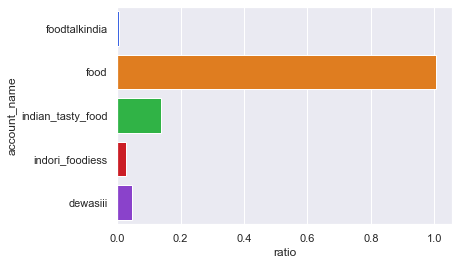

In [14]:
acnt_ratio=pd.DataFrame(account_vs_ratio)
acnt_ratio.columns=["account_name","ratio","average"]

sns.barplot(x="ratio",y="account_name",data=acnt_ratio)
acnt_ratio